In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%cd ..

/home/naomichi/repos/src/github.com/agatan/ocr-experiments


In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from ocr.preprocessing.generator import CSVGenerator
from ocr.models import resnet50, bboxnet_subclass, mobilenet
from ocr.data import process

In [5]:
estimator = tf.estimator.Estimator(bboxnet_subclass.model_fn, model_dir='./checkpoints')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './checkpoints', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa1d4ffa860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './checkpoints', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa1d501bb70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
++++++


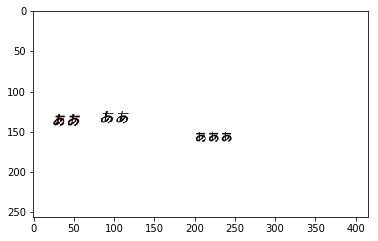

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./checkpoints/model.ckpt-800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[[-12.158419  236.74889    11.096348  248.47256  ]
 [ -4.1584187 236.74889    19.096348  248.47256  ]
 [-12.158419  244.74889    11.096348  256.47256  ]
 [ -4.1584187 244.74889    19.096348  256.47256  ]
 [-13.154454  221.03717    12.380263  233.3598   ]
 [-13.154454  229.03717    12.380263  241.3598   ]
 [-13.20709   205.1048     12.416369  217.48068  ]
 [-13.20709   213.1048     12.416369  225.48068  ]
 [-13.212396   77.152664   12.408819   89.52998  ]
 [-13.212396   85.152664   12.408819   97.52998  ]
 [-13.212444  101.15263    12.408858  113.53003  ]
 [-13.212444   93.15263    12.408858  105.53003  ]
 [-13.212445  165.15262    12.408885  177.53003  ]
 [-13.212445  157.15262    12.408885  169.53003  ]
 [ -5.212449  141.1526

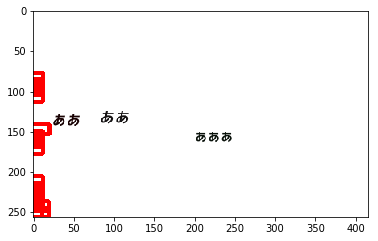

[[-12.15842   236.74889    11.096348  248.47256  ]
 [ -4.1584196 236.74889    19.096348  248.47256  ]
 [-12.15842   244.74889    11.096348  256.47256  ]
 [ -4.1584196 244.74889    19.096348  256.47256  ]
 [-13.154454  221.03717    12.380263  233.3598   ]
 [-13.154454  229.03717    12.380263  241.3598   ]
 [-13.20709   205.1048     12.416369  217.48068  ]
 [-13.20709   213.1048     12.416369  225.48068  ]
 [-13.212396   77.152664   12.408819   89.52998  ]
 [-13.212396   85.152664   12.408819   97.52998  ]
 [-13.212444  101.15263    12.408857  113.53003  ]
 [-13.212444   93.15263    12.408857  105.53003  ]
 [-13.212445  165.15262    12.408885  177.53003  ]
 [-13.212445  157.15262    12.408885  169.53003  ]
 [ -5.212449  141.15262    20.408884  153.53004  ]
 [-13.212449  149.15262    12.408884  161.53004  ]]
[[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -

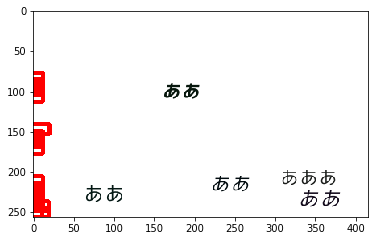

[[-12.15842   236.74889    11.096348  248.47256  ]
 [ -4.1584196 236.74889    19.096348  248.47256  ]
 [-12.15842   244.74889    11.096348  256.47256  ]
 [ -4.1584196 244.74889    19.096348  256.47256  ]
 [-13.154454  221.03717    12.380263  233.35982  ]
 [-13.154454  229.03717    12.380263  241.35982  ]
 [-13.20709   205.1048     12.416369  217.48068  ]
 [-13.20709   213.1048     12.416369  225.48068  ]
 [-13.212396   77.152664   12.408819   89.52998  ]
 [-13.212396   85.152664   12.408819   97.52998  ]
 [-13.212444  101.15263    12.408858  113.53003  ]
 [-13.212444   93.15263    12.408858  105.53003  ]
 [-13.212445  165.15262    12.408885  177.53003  ]
 [-13.212445  157.15262    12.408885  169.53003  ]
 [ -5.212449  141.15262    20.408884  153.53004  ]
 [-13.212449  149.15262    12.408884  161.53004  ]]
[[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -

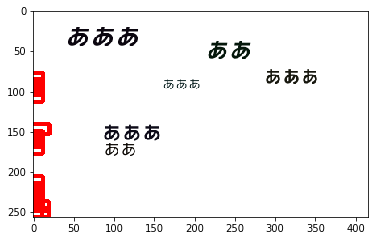

[[-12.15842   236.74889    11.096348  248.47256  ]
 [ -4.1584196 236.74889    19.096348  248.47256  ]
 [-12.15842   244.74889    11.096348  256.47256  ]
 [ -4.1584196 244.74889    19.096348  256.47256  ]
 [-13.154454  221.03717    12.380263  233.3598   ]
 [-13.154454  229.03717    12.380263  241.3598   ]
 [-13.20709   205.1048     12.416369  217.48068  ]
 [-13.20709   213.1048     12.416369  225.48068  ]
 [-13.212396   77.152664   12.408819   89.52998  ]
 [-13.212396   85.152664   12.408819   97.52998  ]
 [-13.212444  101.15263    12.408858  113.53003  ]
 [-13.212444   93.15263    12.408858  105.53003  ]
 [-13.212445  165.15262    12.408885  177.53003  ]
 [-13.212445  157.15262    12.408885  169.53003  ]
 [ -5.212449  141.15262    20.408884  153.53004  ]
 [-13.212449  149.15262    12.408884  161.53004  ]]
[[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -

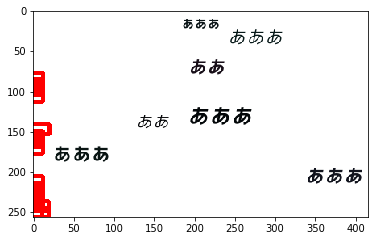

In [6]:
import random
import cv2
import math
import numpy as np
from itertools import groupby
estimator = tf.estimator.Estimator(bboxnet_subclass.model_fn, model_dir='./checkpoints')
x, y = next(CSVGenerator('./data/processed/annotations.csv', features_pixel=8, input_size=(512 // 2, 832 // 2)).batches(4))
input_fn = tf.estimator.inputs.numpy_input_fn(x, y=y, shuffle=False)
# estimator.train(input_fn)
print('++++++')

images = x['image']
plt.imshow(images[0])
plt.show()
for image, predict in zip(images, estimator.predict(input_fn)):
    boxes = predict['boxes']
    texts = predict['texts']
    print(boxes)
    print(texts)
    target = (image.copy() * 255).astype(np.uint8)
    for (l, t, r, b) in boxes:
        cv2.rectangle(target, (l, t), (r, b), (255, 0, 0), thickness=3)
    plt.imshow(target)
    plt.show()

In [7]:
estimator.get_variable_value('batch_normalization/moving_variance')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [8]:
estimator.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
[]


/home/naomichi/repos/src/github.com/agatan/ocr-experiments/venv/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-12-15:49:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./checkpoints/model.ckpt-800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-12-15:49:26
INFO:tensorflow:Saving dict for global step 800: global_step = 800, loss = 7.9967055
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 800: ./checkpoints/model.ckpt-800


{'loss': 7.9967055, 'global_step': 800}